<a href="https://colab.research.google.com/github/ulisses-adonis/.Artificial-neural-network--projects/blob/main/RNN(LSTM)_s%C3%A9rie_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#Linspace retorna números espaçados de modo uniforme em um intervalo. Dessa forma, dado um ponto inicial e de parada, assim como a quantidade de valores, 
# linspace irá distribuí-los uniformemente para você em uma matriz NumPy.
x = np.linspace(0,50,501) # 0 = ponto de partida, 50 = ponto de parada, 501 = incremento
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

Defino meu Y igual ao valor do seno naquele X em particular. Significa que posso  dizer que verei minha onda senoidal de 0 a 50. E após construir a  onda senoidal, devemos transformá-la em um DataFrame

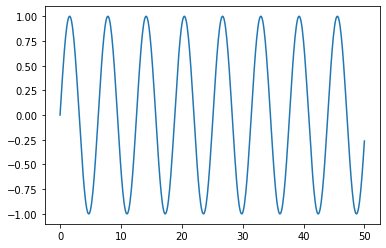

In [6]:
y = np.sin(x)
plt.plot(x,y)

In [7]:
df = pd.DataFrame (data = y, index =x, columns = ['Seno'])
df


,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:
test_percent=0.1
len(df)*test_percent

50.1

Aqui eu decidi a porcentagem do  meu conjunto de dados que seria usado para o conjunto de teste.

In [10]:
# np.round: Arredonda uma matriz para o número de decimais fornecido
test_point= np.round(len(df)*test_percent)
test_point

50.0

In [11]:
test_ind = int(len(df)-test_point)
test_ind


451

Eu  arredondei o valor para um número inteiro para que futuramente eu  pudesse usa-lo para uma indexação.
Abaixo eu defino meu conjunto de dados de treinamento, onde usaremos um corte para indicar  que meu conjunto de treino começe na primeira linha  do conjunto df até  "test_ind", mas não o inclua. E meu conjunto de teste comece em "test_ind" e vá até o final.

In [12]:
# iloc: Indexação puramente baseada em localização de números inteiros para seleção por posição. 
#df.iloc( :,X)pega todas linhas da tabela, até o limite x
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
train

,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [14]:
test

,Seno
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


A próxima etapa é escalar os dados , porém , as coisas serão um pouco diferentes do que o que eu fiz em minhas redes neurais artificiais por causa da maneira como as redes neurais recorrentes alimentam os dados produzindos de volta os neurônios.

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [18]:
scaled_train = scaler.transform(train)
len(scaled_train)

451

In [19]:
scaled_test = scaler.transform(test)
len(scaled_test)

50

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
#help (TimeseriesGenerator)

Basicamente, trata-se de uma classe do tensorflow muito útil que gera  lotes ( bacthes)  para essa sequência de dados. 

**TEORIA** : Os dados da série temporal devem ser transformados em uma estrutura de amostras com componentes de entrada e saída antes que possam ser usados ​​para se ajustar a um modelo de aprendizado supervisionado. Isso pode ser desafiador se você tiver que realizar essa transformação manualmente. A biblioteca de aprendizado profundo Keras fornece o TimeseriesGenerator para transformar automaticamente dados univariados e multivariados de séries temporais, em amostras prontas para treinar modelos de aprendizado profundo.

A série temporal deve ser transformada em amostras com componentes de entrada e saída. A transformação informa o que o modelo aprenderá e como você pretende usar o modelo no futuro ao fazer previsões, por exemplo, o que é necessário para fazer uma previsão (X) e qual previsão é feita (y).

Para uma série temporal univariada interessada em previsões de uma etapa, as observações em etapas de tempo anteriores, as chamadas observações de atraso, são usadas como entrada e a saída é a observação na etapa de tempo atual.

In [21]:
length = 50
#batch_size: o número de amostras a serem retornadas em cada iteração (por exemplo, 3).
batch_size = 1 

# Agora, nós criamos nosso gerador definindo nossa fonte de nossos dados.
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length , batch_size=batch_size )

Tanto pra X quanto para Y, eu usei o conjunto de dados "scaled_train". 

In [22]:
len(scaled_train)

451

In [23]:
#Nosso objeto gerador é 449 ( generator - length)  
len(generator)

401

In [24]:
X,y = generator [0]

In [25]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [26]:
y

array([[0.02053313]])

###**Observação:** No primeiro teste, eu usei length =4

#### Então, o que esses valores realmente significam: Essencialmente, o que vamos dizer ao nosso modelo de rede neural recorrente é :  dado esses dois pontos ( x = 0.94 e x= 0.98) em uma linha, tente prever este terceiro ponto ( y = 0.98) e você notará que os primeiros três números
#### Se olharmos o conjunto abaixo, scaled_train, podemos ver que os dois primeiros números representam o conjunto X e o terceiroé o Y. 


In [27]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


 Então é essencialmente isso que este gerador está usando quando se trata de comprimento ( length = 2) . Estamos dizendo que dado este comprimento, podemos prever um número. Agora, este comprimento não deve ser apenas uma escolha arbitrária do comprimento do X . Deve eve ser o suficiente para a rede neural detectar qualquer sazonalidade ou efeitos repetidos.

O que eu quero fazer é alimentar minha rede com uma sequência de informações longa o suficiente para que eu possa começar a perceber qualquer tendência.

Provavelmente não é muito útil para a rede ver apenas um ponto no passado e um ponto no futuro, em vez disso, provavelmente quero ter pelo menos pontos suficientes para que uma rede  pegar neste movimento cíclico ( neste caso, o seno) uma tendência.

Portanto, posso ver que, se for de talvez zero a provavelmente cerca de vinte e cinco pontos, posso ver um ciclo completo.

#Modelo

In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense,SimpleRNN, LSTM

Precisamos definir  quantos recursos estamos realmente treinando.

Em nosso caso, temos apenas uma entrada de recurso que é x tentando prever Y.

Portanto, o número de recursos é apenas um.

In [30]:
n_features =1

In [31]:
#Um modelo sequencial, como o nome sugere, permite que você crie modelos camada por camada, passo a passo.
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer ='adam', loss='mse')

In [32]:
#resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit_generator(generator,epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


401/401 [==============================] - 3s 6ms/step - loss: 0.0574
Epoch 2/5
401/401 [==============================] - 2s 6ms/step - loss: 8.8943e-05
Epoch 3/5
401/401 [==============================] - 3s 6ms/step - loss: 6.8929e-05
Epoch 4/5
401/401 [==============================] - 2s 6ms/step - loss: 8.8777e-05
Epoch 5/5
401/401 [==============================] - 2s 6ms/step - loss: 4.5393e-04


In [34]:
losses = pd.DataFrame(model.history.history)

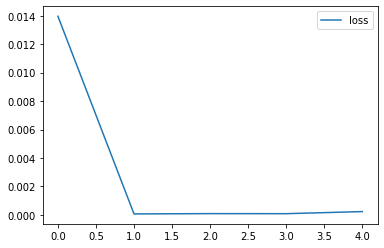

In [35]:
losses.plot()

Qual é o primeiro batch(lote) que devo passar para meu modelo para prever algo no conjunto de teste?

Bem, isso deve vir dos meus dados de treinamento em escala, desde o comprimento negativo até o fim.

Basicamente, vamos pegar os últimos vinte e cinco pontos de nosso conjunto de treinamento para prever um ponto no futuro, que é o primeiro ponto em nosso conjunto de teste.

In [36]:
first_eval_batch =  scaled_train [-length:]

preciso reformulá-lo para a forma que o modelo espera

In [37]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [38]:
model.predict((first_eval_batch))

array([[0.966195]], dtype=float32)

agora , vamos ver se ele achou corretamente o primeiro número co conjunto teste.

In [39]:
scaled_test[0]

array([0.94955134])

Bem, o que eu faço aqui é um loop com 25 pontos a frente.  À medida que o modelo prevê, adiciono um ponto  adicional até que estejamos essencialmente prevendo ou fazendo previsões ao longo de previsões anteriores.

In [40]:
# pego os ultimos 50 números do conjunto treino
#scaled_train[-length:]

#Montando o núcleo de predição

In [41]:
#O que esse código está fazendo é : vá em frente e mova o lote atual em uma etapa de tempo. Ou seja , ao prever 
#o próximo número, apague o primeiro número do conjunto de dados e adicione o número previsto na ultima linha.
#predicted_value = [[[99]]]
#np.append(current_batch[:,1:,:],[[[99]]],axis=1)

In [42]:
#minhas previsões de teste ( test_predictions) é uma lista vazia
test_predictions = []

first_eval_batch = scaled_train[-length:]

current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #minha primeira previsão
  current_pred = model.predict(current_batch)[0]

  #E então o que vou fazer é dizer OK, vá em frente e pegue essa previsão atual, mas agora,
  #para continuar prevendo no futuro, mova meu lote atual um passo à frente
  test_predictions.append(current_pred)

  #o que é essencialmente o que isso faz: livra-se do primeiro item e, em vez disso, 
  #o substitui, adicionando a previsão atual no fim do conjunto
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [43]:
test_predictions

[array([0.966195], dtype=float32),
 array([0.99022186], dtype=float32),
 array([1.0067995], dtype=float32),
 array([1.0189362], dtype=float32),
 array([1.029016], dtype=float32),
 array([1.0334605], dtype=float32),
 array([1.0312397], dtype=float32),
 array([1.0242722], dtype=float32),
 array([1.013055], dtype=float32),
 array([0.9982469], dtype=float32),
 array([0.9769603], dtype=float32),
 array([0.951256], dtype=float32),
 array([0.92485374], dtype=float32),
 array([0.8968428], dtype=float32),
 array([0.8649446], dtype=float32),
 array([0.830715], dtype=float32),
 array([0.7949129], dtype=float32),
 array([0.75917184], dtype=float32),
 array([0.7217169], dtype=float32),
 array([0.68233424], dtype=float32),
 array([0.6421721], dtype=float32),
 array([0.6024714], dtype=float32),
 array([0.5631551], dtype=float32),
 array([0.52255535], dtype=float32),
 array([0.4823006], dtype=float32),
 array([0.4435586], dtype=float32),
 array([0.4064663], dtype=float32),
 array([0.37013882], dtype=f

Preciso lembrar que eu dimensionei o conjunto de dados, então devo inverter essa transformação.


In [44]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.93238426],
       [ 0.98043762],
       [ 1.01359255],
       [ 1.03786575],
       [ 1.05802531],
       [ 1.0669142 ],
       [ 1.06247274],
       [ 1.04853776],
       [ 1.02610347],
       [ 0.99648759],
       [ 0.95391472],
       [ 0.90250648],
       [ 0.84970243],
       [ 0.79368095],
       [ 0.72988507],
       [ 0.66142646],
       [ 0.58982278],
       [ 0.5183413 ],
       [ 0.44343197],
       [ 0.36466733],
       [ 0.28434368],
       [ 0.20494295],
       [ 0.12631098],
       [ 0.04511211],
       [-0.03539673],
       [-0.11288012],
       [-0.18706412],
       [-0.2597185 ],
       [-0.32998835],
       [-0.39412089],
       [-0.45210245],
       [-0.50506442],
       [-0.55524797],
       [-0.5986257 ],
       [-0.63192211],
       [-0.65917475],
       [-0.68099455],
       [-0.69616059],
       [-0.70162218],
       [-0.699028  ],
       [-0.69128965],
       [-0.6774433 ],
       [-0.65447204],
       [-0.62182257],
       [-0.58528027],
       [-0

In [45]:
test ['Predições'] = true_predictions
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Seno,Predições
45.1,0.899097,0.932384
45.2,0.938307,0.980438
45.3,0.968142,1.013593
45.4,0.988304,1.037866
45.5,0.998591,1.058025
45.6,0.998900,1.066914
45.7,0.989229,1.062473
45.8,0.969673,1.048538
45.9,0.940429,1.026103
46.0,0.901788,0.996488


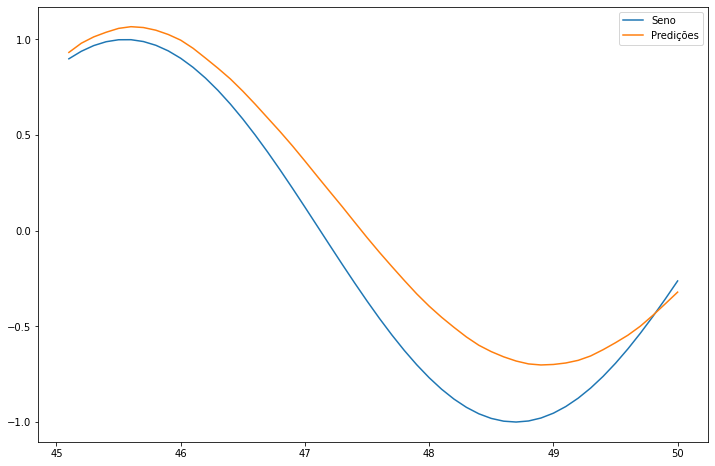

In [46]:
test.plot (figsize = (12,8))

**Autor** : As previsões definitivamente não são perfeitas, mas é muito interessante ver que meu modelo é realmente capaz de começar a imitar o comportamento de uma onda senoidal.


In [47]:
from tensorflow.keras.callbacks import  EarlyStopping


In [48]:
# é recomendado o uso de paciências maiores por causa do ruido gerado
early_stop = EarlyStopping(monitor='val_loss', patience=2)

**Nesse Momento, ocorreu um erro por que eu coloquei**: *length = length*

Portanto, o que acontece é que esse conjunto de dados de teste (em escala) deve ser maior do que o comprimento escolhido para nossos lotes. E isso é essencialmente um sacrifício que temos que fazer para realmente executar este gerador de validação.

O motivo pelo qual estou recebendo esse erro é porque agora, ele está tentando essencialmente seguir o protocolo estabelecido e isso não será permitido.

Você não pode ter seu start_index +length=50 , (uma vez que o tamanho do batch é 49), porque nosso comprimento do lote é exatamente o mesmo tamanho do nosso conjunto de teste. O que não faz sentido, pois estamos essencialmente perdendo a predição do ponto futuro.

Portanto, o que eu devo é redefinir o gerador original para ter um comprimento mais curto ( length = 49).

In [49]:
# Então agora o que ele vai fazer é pegar quarenta e nove pontos e prever o Ponto de número 50
length = 49

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length , batch_size=1 )

#criando um gerador de validação para os dados de teste.. Porém, dessa vez, usaremos o scaled_test como conjunto de dados
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

Portanto, certifique-se de que, se eu começar a criar esses geradores de validação, o comprimento deste lote deva ser , pelo menos, um número abaixo do que o tamanho total dos seus dados de teste.

#Novo Modelo com LSTM

In [50]:
#Um modelo sequencial, como o nome sugere, permite que você crie modelos camada por camada, passo a passo.
model = Sequential()

model.add(LSTM(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer ='adam', loss='mse')

In [51]:
model.fit_generator(generator,epochs=20, validation_data=validation_generator, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 8s 16ms/step - loss: 0.0788 - val_loss: 5.6515e-05
Epoch 2/20
402/402 [==============================] - 6s 14ms/step - loss: 8.7805e-05 - val_loss: 4.8428e-05
Epoch 3/20
402/402 [==============================] - 6s 14ms/step - loss: 9.2430e-05 - val_loss: 5.2126e-05
Epoch 4/20
402/402 [==============================] - 6s 14ms/step - loss: 1.8691e-04 - val_loss: 4.7638e-06
Epoch 5/20
402/402 [==============================] - 6s 14ms/step - loss: 3.3921e-04 - val_loss: 3.6151e-05
Epoch 6/20
402/402 [==============================] - 6s 14ms/step - loss: 5.3354e-05 - val_loss: 2.2156e-05


In [52]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  #minha primeira previsão
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [53]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predições_LSTM'] = true_predictions
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Seno,Predições,Predições_LSTM
45.1,0.899097,0.932384,0.925624
45.2,0.938307,0.980438,0.964501
45.3,0.968142,1.013593,0.995388
45.4,0.988304,1.037866,1.017334
45.5,0.998591,1.058025,1.029886
45.6,0.998900,1.066914,1.032822
45.7,0.989229,1.062473,1.026091
45.8,0.969673,1.048538,1.009775
45.9,0.940429,1.026103,0.984070
46.0,0.901788,0.996488,0.949260


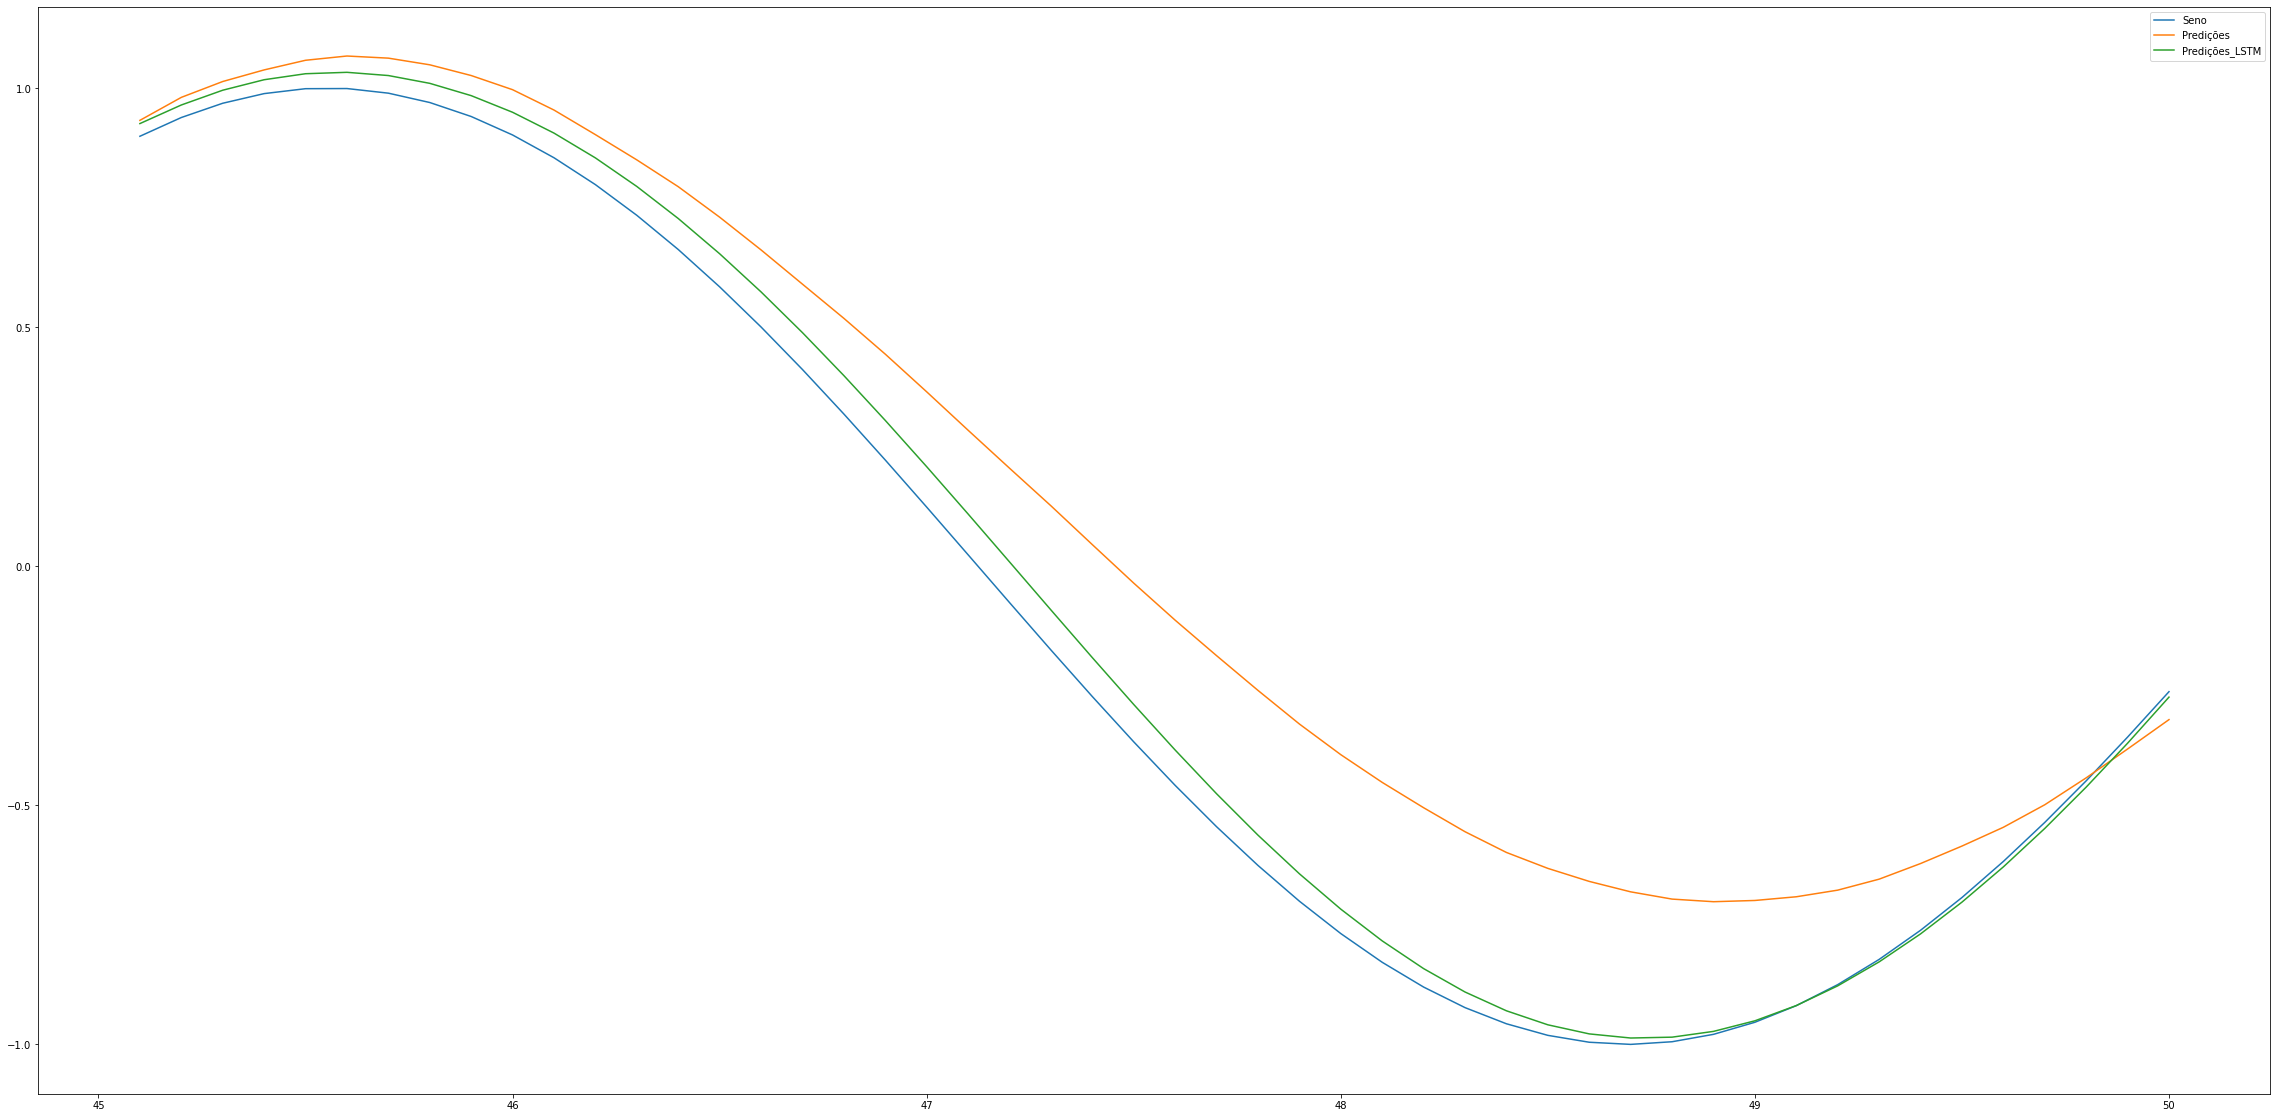

In [54]:
test.plot(figsize=(40,20))

Noto que meu modelo LSTM é muito superior a uma RNN tradicional.

#Nova Previsão



Através da figura abaixo, noto que  a série temporal se limita a x=50. Portanto, irei simular uma previsão além desse valor. 





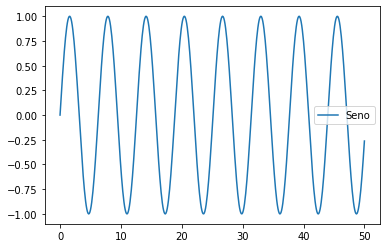

In [55]:
df.plot()


Agora, irei dimensionar todos os meus dados para ajustar a transformação em todos os dados,  uma vez que irei fazer  uma previsão para no futuro

In [56]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [57]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length , batch_size=1 )

In [58]:
model = Sequential()

model.add(LSTM(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer ='adam', loss='mse')

In [59]:
model.fit_generator(generator, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
452/452 [==============================] - 8s 14ms/step - loss: 0.0424
Epoch 2/10
452/452 [==============================] - 6s 14ms/step - loss: 8.5636e-05
Epoch 3/10
452/452 [==============================] - 7s 15ms/step - loss: 7.6276e-05
Epoch 4/10
452/452 [==============================] - 7s 14ms/step - loss: 3.7083e-05
Epoch 5/10
452/452 [==============================] - 7s 15ms/step - loss: 5.8514e-05
Epoch 6/10
452/452 [==============================] - 7s 15ms/step - loss: 9.9001e-04
Epoch 7/10
452/452 [==============================] - 6s 14ms/step - loss: 5.0045e-05
Epoch 8/10
452/452 [==============================] - 6s 14ms/step - loss: 4.8744e-04
Epoch 9/10
452/452 [==============================] - 7s 15ms/step - loss: 5.4163e-05
Epoch 10/10
452/452 [==============================] - 7s 15ms/step - loss: 5.2822e-05


In [67]:
# apesar de ser uma cópia de uma célula anterior, exceto que agora não estou prevendo no meu intervalo de teste.
#Em vez disso, vou fazer uma previsão e  posso decidir quantos espaços desejo prever no futuro.

forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):

  #minha primeira previsão
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)
  
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [68]:
df

,Seno
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [69]:
forecast


[array([0.95408225], dtype=float32),
 array([0.97339654], dtype=float32),
 array([0.98822284], dtype=float32),
 array([0.99843156], dtype=float32),
 array([1.0039157], dtype=float32),
 array([1.0046343], dtype=float32),
 array([1.0006069], dtype=float32),
 array([0.9919038], dtype=float32),
 array([0.97864115], dtype=float32),
 array([0.9609716], dtype=float32),
 array([0.93908155], dtype=float32),
 array([0.91318536], dtype=float32),
 array([0.8835223], dtype=float32),
 array([0.85035574], dtype=float32),
 array([0.81397104], dtype=float32),
 array([0.77467585], dtype=float32),
 array([0.73280025], dtype=float32),
 array([0.6886965], dtype=float32),
 array([0.6427413], dtype=float32),
 array([0.59533334], dtype=float32),
 array([0.5468943], dtype=float32),
 array([0.49786684], dtype=float32),
 array([0.44871235], dtype=float32),
 array([0.39990768], dtype=float32),
 array([0.35194042], dtype=float32)]

A primeira figura, mostra nosso conjunto de dados original. Nota-se que o conjunto de dados "forecast" precisa ser formatado.

In [70]:
forecast = scaler.inverse_transform (forecast)

In [71]:
forecast


array([[ 0.90815898],
       [ 0.94678725],
       [ 0.97643961],
       [ 0.99685689],
       [ 1.00782502],
       [ 1.00926219],
       [ 1.00120752],
       [ 0.98380144],
       [ 0.95727639],
       [ 0.92193756],
       [ 0.87815782],
       [ 0.82636585],
       [ 0.76704016],
       [ 0.70070763],
       [ 0.62793881],
       [ 0.54934905],
       [ 0.46559852],
       [ 0.37739175],
       [ 0.28548212],
       [ 0.19066691],
       [ 0.09378964],
       [-0.00426452],
       [-0.10257271],
       [-0.20018127],
       [-0.29611501]])

In [78]:
#Usando essa lógica, direi que meu índice de previsão( forecast_index) é igual ao intervalo abaixo, começando em 50,1.
#Devo me lembrar que o último número do conjunto original de dados é 50, portanto, o primeiro número do conjunto de previsões 
#será 50.1 Meu passo será 0.1 . Portanto 25 pontos x 0.1 = 2.5. Assim 50.1+2,5 = 52,6
forecast_index = np.arange(50.1,52.6,step=0.1)

In [77]:
forecast_index

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5])

In [74]:
len(forecast_index)

25

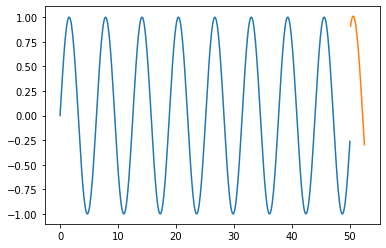

In [75]:
plt.plot(df.index,df['Seno'])
plt.plot(forecast_index,forecast)

E a razão pela qual eu vejo uma grande lacuna, é porque essas são duas séries essencialmente separadas. Portanto, não há linha que os conecte automaticamente aqui. No entanto, eu poderia fazer vinculá-los usando concatenação de pontos.